<a href="https://colab.research.google.com/github/DikshantBadawadagi/British_Airways_JS/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Accuracy for GradientBoosting: 0.8524
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for RandomForest: 0.8555


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:23:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy for XGBoost: 0.8521

🚀 Best Performing Model: RandomForest with Accuracy: 0.8555

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12784
           1       0.58      0.08      0.14      2216

    accuracy                           0.86     15000
   macro avg       0.72      0.54      0.53     15000
weighted avg       0.82      0.86      0.81     15000



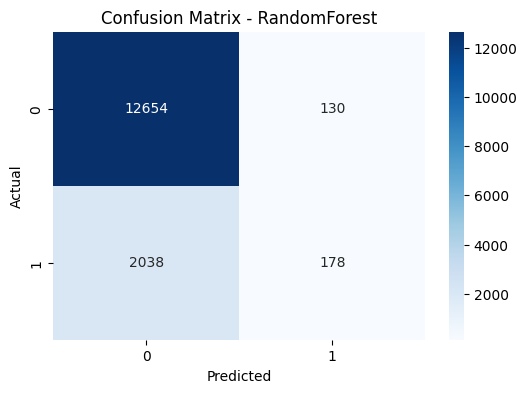

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/customer_booking.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data.ffill(inplace=True)

if 'flight_day' in data.columns:
    data['flight_day'] = data['flight_day'].astype('category').cat.codes

label_encoders = {}
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

scaler = StandardScaler()
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay',
                  'flight_hour', 'flight_day', 'flight_duration']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

X = data.drop('booking_complete', axis=1)
y = data['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'GradientBoosting': GradientBoostingClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

param_grids = {
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 4],
        'learning_rate': [0.05, 0.1]
    }
}

best_models = {}
accuracies = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    accuracies[model_name] = accuracy

best_model_name = max(accuracies, key=accuracies.get)
best_model = best_models[best_model_name]

print(f"\n🚀 Best Performing Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.4f}")

y_pred_best = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")

In [3]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

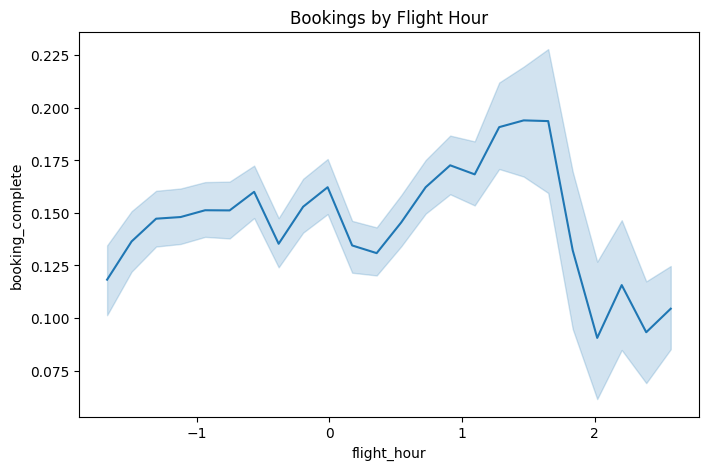

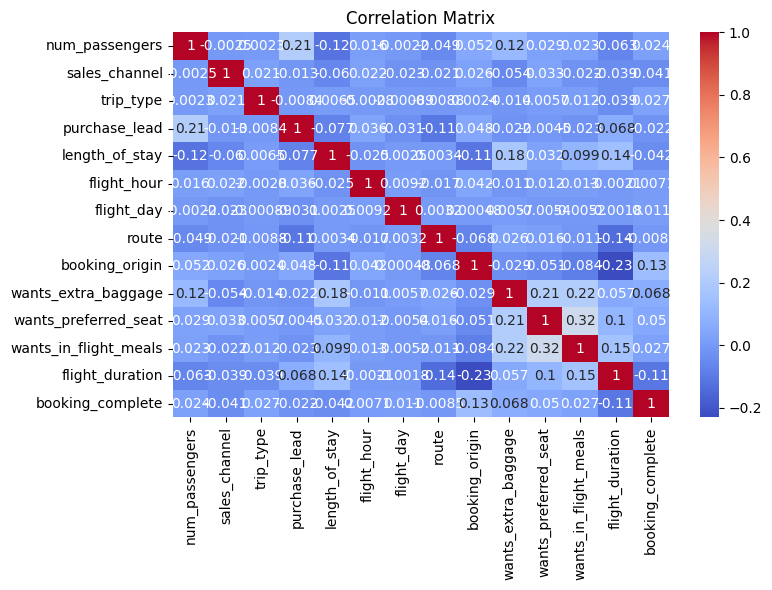

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.lineplot(data=data, x='flight_hour', y='booking_complete')
plt.title('Bookings by Flight Hour')
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-11-121ff9d68158>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


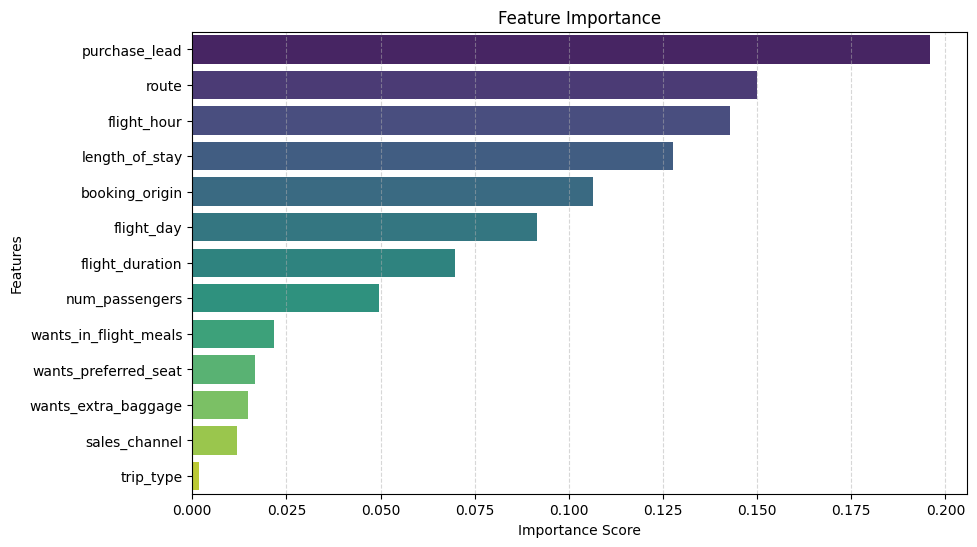

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load Data
file_path = '/content/customer_booking.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Identify categorical columns that need encoding
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin',
                    'wants_extra_baggage', 'wants_preferred_seat',
                    'wants_in_flight_meals', 'flight_day']

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Define features and target
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Train RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X, y)

# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
